In [0]:
import os
import numpy as np
from __future__ import absolute_import
from __future__ import print_function

import cv2
from keras.utils import plot_model

Using TensorFlow backend.


In [0]:
np.random.seed(1337)  # for reproducibility

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD, Adadelta, Adagrad

In [0]:
from six.moves import cPickle as pickle

In [0]:
import tensorflow as tf
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device



In [0]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [0]:
pickle_files = ['open_eyes.pickle', 'closed_eyes.pickle']
i = 0
for pickle_file in pickle_files:
    with open(pickle_file, 'rb') as f:
        save = pickle.load(f)
        if i == 0:
            train_dataset = save['train_dataset']
            train_labels = save['train_labels']
            test_dataset = save['test_dataset']
            test_labels = save['test_labels']
        else:
            print("here")
            train_dataset = np.concatenate((train_dataset, save['train_dataset']))
            train_labels = np.concatenate((train_labels, save['train_labels']))
            test_dataset = np.concatenate((test_dataset, save['test_dataset']))
            test_labels = np.concatenate((test_labels, save['test_labels']))
        del save  # hint to help gc free up memory
    i += 1

here


In [0]:
print('Training set', train_dataset.shape, train_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (3876, 24, 24, 1) (3876, 1)
Test set (970, 24, 24, 1) (970, 1)


In [0]:
BS = 30
nb_classes = 1
EPOCHS = 12

In [0]:
train_X = train_dataset
train_X_ = train_X.reshape((train_X.shape[0], train_X.shape[3]) + train_X.shape[1:3])
train_Y = train_labels

In [0]:
test_X = test_dataset
test_X = test_X.reshape((test_X.shape[0], test_X.shape[3]) + test_X.shape[1:3])
test_Y = test_labels

In [0]:
# print shape of data while model is building
print("{1} train samples, {4} channel{0}, {2}x{3}".format("" if train_X.shape[1] == 1 else "s", *train_X.shape))
print("{1}  test samples, {4} channel{0}, {2}x{3}".format("" if test_X.shape[1] == 1 else "s", *test_X.shape))

3876 train samples, 24 channel, 1x24
970  test samples, 24 channel, 1x24


In [0]:
# input image dimensions
_, img_channels, img_rows, img_cols = train_X.shape

In [0]:
!pip install tensorflow==1.15.0

In [0]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), padding='same',input_shape=(img_channels, img_rows, img_cols),data_format='channels_first'))
model.add(Activation('relu'))
model.add(Convolution2D(24, (3, 3), data_format='channels_first'),)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3), padding='same', data_format='channels_first'))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [0]:
# let's train the model using SGD + momentum (how original).
stochastic_gd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [0]:
model.compile(loss='binary_crossentropy', optimizer=stochastic_gd, metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.fit(train_X, train_Y, batch_size=BS, epochs=EPOCHS, verbose=2, validation_data=(test_X, test_Y))


Train on 3876 samples, validate on 970 samples
Epoch 1/12
 - 20s - loss: 0.6439 - accuracy: 0.6251 - val_loss: 0.5766 - val_accuracy: 0.7103
Epoch 2/12
 - 20s - loss: 0.5538 - accuracy: 0.7219 - val_loss: 0.5120 - val_accuracy: 0.7619
Epoch 3/12
 - 20s - loss: 0.4431 - accuracy: 0.7921 - val_loss: 0.4457 - val_accuracy: 0.7907
Epoch 4/12
 - 20s - loss: 0.3342 - accuracy: 0.8584 - val_loss: 0.2692 - val_accuracy: 0.9052
Epoch 5/12
 - 20s - loss: 0.2656 - accuracy: 0.8963 - val_loss: 0.2820 - val_accuracy: 0.8784
Epoch 6/12
 - 20s - loss: 0.2355 - accuracy: 0.9066 - val_loss: 0.3904 - val_accuracy: 0.8175
Epoch 7/12
 - 20s - loss: 0.2063 - accuracy: 0.9120 - val_loss: 0.1724 - val_accuracy: 0.9392
Epoch 8/12
 - 20s - loss: 0.1829 - accuracy: 0.9288 - val_loss: 0.1481 - val_accuracy: 0.9495
Epoch 9/12
 - 20s - loss: 0.1666 - accuracy: 0.9309 - val_loss: 0.1950 - val_accuracy: 0.9299
Epoch 10/12
 - 20s - loss: 0.1659 - accuracy: 0.9329 - val_loss: 0.2640 - val_accuracy: 0.8948
Epoch 11/12

In [0]:
scores = model.evaluate(test_X, test_Y,  verbose=1)

970/970 [==============================] - 1s 1ms/step


In [0]:
print('Test score:', scores[0])
print('Test accuracy:', scores[1])

Test score: 0.1422956415519272
Test accuracy: 0.9494845271110535


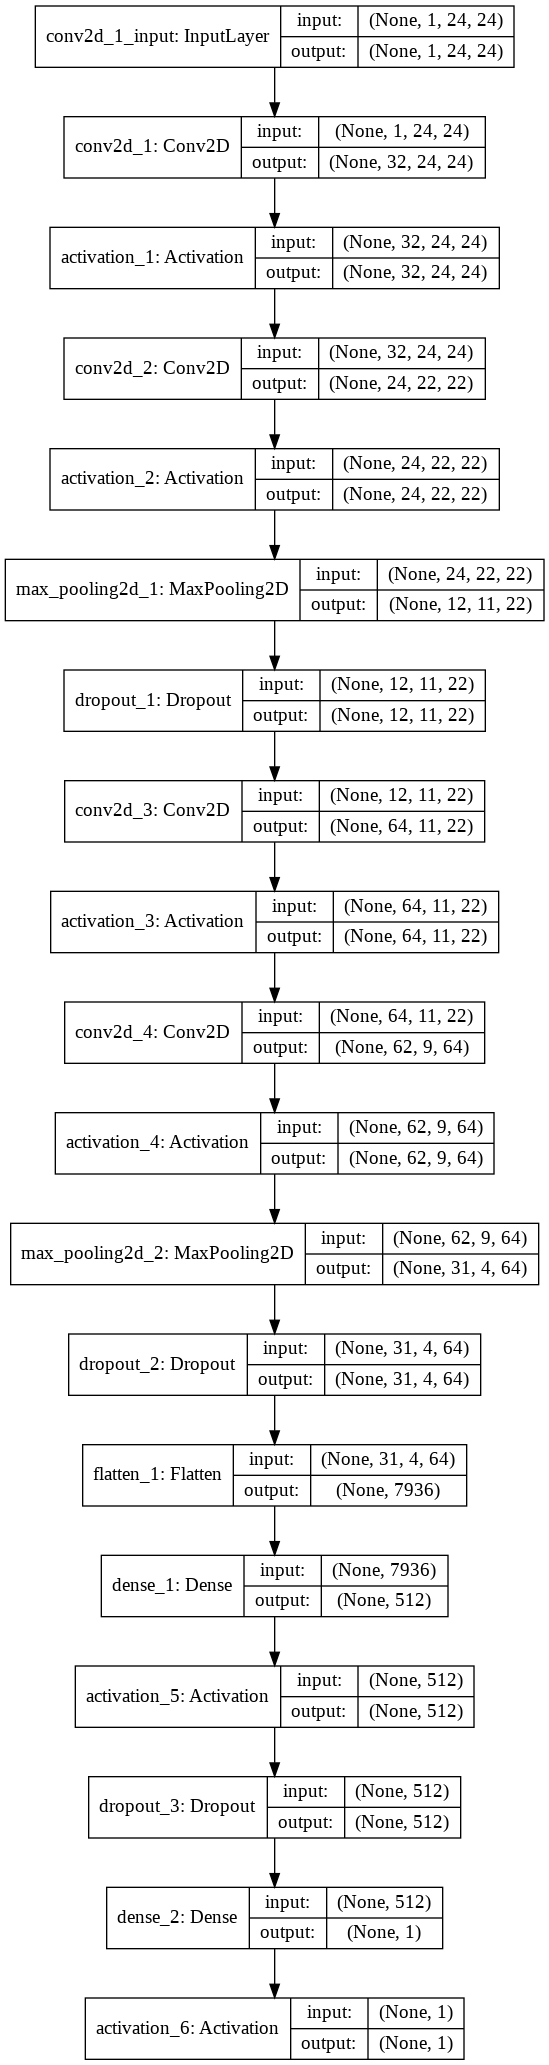

In [0]:
plot_model(model, to_file='model.png',show_shapes=True)